# Stereoisomer testing on ChiENN - enantiomers/diastereomers (multiple centers)

## Importing section

In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import sys
sys.path.append("../../../../")

from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol
from ptgnn.features.chienn.mol_to_data import mol_to_data
from ptgnn.transform import edge_graph_transform, vertex_graph_transform

## Define SMILES strings

In [2]:
smiles_list = [
    "O=C[C@](O)([H])[C@]([H])(O)CO",
    # "OC[C@](O)([H])[C@]([H])(O)C=O",
    
    "O=C[C@@](O)([H])[C@]([H])(O)CO",
    # "OC[C@](O)([H])[C@@]([H])(O)C=O",
    
    "O=C[C@](O)([H])[C@@]([H])(O)CO",
    # "OC[C@@](O)([H])[C@]([H])(O)C=O",
    
    "O=C[C@@](O)([H])[C@@]([H])(O)CO",
    # "OC[C@@](O)([H])[C@@]([H])(O)C=O",
]

In [3]:
smiles_list = [
    "CN[C@H]1C[C@H](c2ccc(Cl)c(Cl)c2)c2ccccc21",
    "CN[C@H]1C[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21",
    "CN[C@@H]1C[C@H](c2ccc(Cl)c(Cl)c2)c2ccccc21",
    "CN[C@@H]1C[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21"
]

## Visualize and confirm stereomer classification (E/Z)

In [4]:
def showAndChiral(smiles):
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    print(AllChem.FindMolChiralCenters(mol))
    for bond in mol.GetBonds():
        if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            print("Bond", bond.GetIdx(), "stereo:", bond.GetStereo())

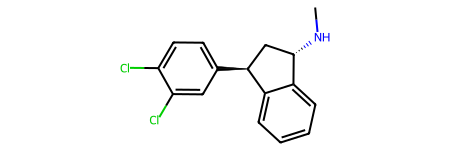

[(2, 'S'), (4, 'R')]


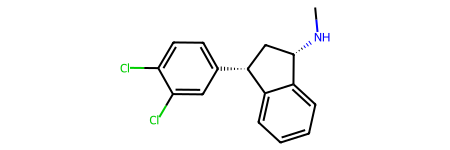

[(2, 'S'), (4, 'S')]


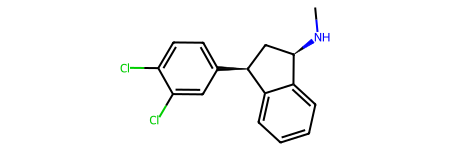

[(2, 'R'), (4, 'R')]


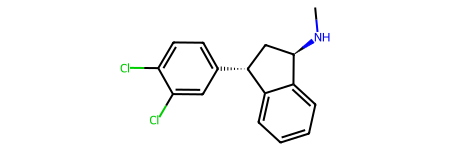

[(2, 'R'), (4, 'S')]


In [5]:
for smile in smiles_list:
    showAndChiral(smile)

##  Convert to (edge) graph with ptree

In [6]:
# get molecules
mol_list = [
    smiles_to_3d_mol(
        smiles,
        max_number_of_attempts=100,
        max_number_of_atoms=100
    )
    for smiles in smiles_list
]

In [7]:
data_list = [
    mol_to_data(mol)
    for mol in mol_list
]

In [8]:
data_list = [
    edge_graph_transform(
        data,
        transformation_mode="permutation_tree",
        mol=mol,
        transformation_parameters={
            'k':  3,
            'tetrahedral_chiral': False,
            'chiral_center_selective': False,
            'chiral_center_select_potential': False,
            'multi_stereo_center_dia': True,
            'separate_tree': False
        }
    )
    for data, mol in zip(data_list, mol_list)
]

In [9]:
d = data_list[0]
display(d.ptree, d.initial_map)
for i in range(d.num_layer):
    display(f"layer: {i}")
    display(d[f"layer{i}_order_matrix"], d[f"layer{i}_type_mask"], d[f"layer{i}_pooling"])

['{"S": [0, 1, {"P": [3, 7, 5]}]}',
 '{"S": [1, 0, {"P": [9, 11]}]}',
 '{"S": [2, 3, {"P": [1, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"P": [1, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"P": [1, 3, 5]}]}',
 '{"S": [7, 6]}',
 '{"S": [8, 9, {"P": [0, 11]}]}',
 '{"S": [9, 8, {"P": [13, 15, 17]}]}',
 '{"S": [10, 11, {"P": [0, 9]}]}',
 '{"S": [11, 10]}',
 '{"S": [12, 13, {"P": [{"P": [{"Z": [25, 29, 27]}, {"Z": [8, 17, 15]}]}, {"P": [{"Z": [27, 29, 25]}, {"Z": [15, 17, 8]}]}]}]}',
 '{"S": [13, 12, {"P": [19, 23, 21]}]}',
 '{"S": [14, 15, {"P": [8, 13, 17]}]}',
 '{"S": [15, 14, {"P": [54, 68]}]}',
 '{"S": [16, 17, {"P": [8, 15, 13]}]}',
 '{"S": [17, 16]}',
 '{"S": [18, 19, {"P": [12, 21, 23]}]}',
 '{"S": [19, 18, {"P": [{"P": [{"Z": [25, 29, 27]}, {"Z": [8, 17, 15]}]}, {"P": [{"Z": [27, 29, 25]}, {"Z": [15, 17, 8]}]}]}]}',
 '{"S": [20, 21, {"P": [12, 23, 19]}]}',
 '{"S": [21, 20]}',
 '{"S": [22, 23, {"P": [12, 19, 21]}]}',
 '{"S": [23, 22]}',
 '{"S": [24, 25, {"P": [18, 27, 29]}]}',


tensor([ 0,  1,  3,  7,  5,  1,  0,  9, 11,  2,  3,  1,  5,  7,  3,  2,  4,  5,
         1,  7,  3,  5,  4,  6,  7,  1,  3,  5,  7,  6,  8,  9,  0, 11,  9,  8,
        13, 15, 17, 10, 11,  0,  9, 11, 10, 12, 13, 25, 29, 27,  8, 17, 15, 27,
        29, 25, 15, 17,  8, 13, 12, 19, 23, 21, 14, 15,  8, 13, 17, 15, 14, 54,
        68, 16, 17,  8, 15, 13, 17, 16, 18, 19, 12, 21, 23, 19, 18, 25, 29, 27,
         8, 17, 15, 27, 29, 25, 15, 17,  8, 20, 21, 12, 23, 19, 21, 20, 22, 23,
        12, 19, 21, 23, 22, 24, 25, 18, 27, 29, 25, 24, 31, 33, 26, 27, 18, 29,
        25, 27, 26, 53, 55, 28, 29, 18, 25, 27, 29, 28, 30, 31, 24, 33, 31, 30,
        35, 37, 32, 33, 24, 31, 33, 32, 48, 51, 34, 35, 30, 37, 35, 34, 39, 41,
        36, 37, 30, 35, 37, 36, 38, 39, 34, 41, 39, 38, 43, 45, 40, 41, 34, 39,
        41, 40, 42, 43, 38, 45, 43, 42, 44, 45, 38, 43, 45, 44, 47, 49, 46, 47,
        44, 49, 47, 46, 48, 49, 44, 47, 49, 48, 32, 51, 50, 51, 32, 48, 51, 50,
        52, 53, 26, 55, 53, 52, 57, 59, 

'layer: 0'

[[tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
            14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
            28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
            42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
            56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
            70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
            84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
            98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
           112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
           126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
           140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
           154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
           168, 169, 170, 17

[[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]]

[[tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
           14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
           28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
           42,  43,  44,  45,  46,  47,  47,  47,  48,  48,  48,  49,  49,  49,
           50,  50,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
           62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
           76,  77,  78,  79,  79,  79,  80,  80,  80,  81,  81,  81,  82,  82,
           82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
           96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
          110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
          124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
          138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
          152, 153, 154, 155, 156, 157, 

'layer: 1'

[[tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
            14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
            28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
            42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
            56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
            70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
            84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
            98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
           112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
           126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
           140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
           154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
           168, 169, 170, 17

[[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
          1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0])]]

[[tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
           14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
           28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
           42,  43,  44,  45,  46,  47,  47,  48,  48,  49,  50,  51,  52,  53,
           54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
           68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  77,  78,  78,  79,
           80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
           94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
          108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
          122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
          136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
          150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
          164, 165, 166, 167, 168, 169, 

'layer: 2'

[[tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
            14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
            28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
            42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
            56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
            70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
            84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
            98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
           112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
           126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
           140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
           154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
           168, 169, 170, 17

[[tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
          0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
          1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
          1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
          1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
          1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          1, 1, 0, 0])]]

[[tensor([  0,   1,   2,   2,   2,   3,   4,   5,   5,   6,   7,   8,   8,   8,
            9,  10,  11,  12,  13,  13,  13,  14,  15,  16,  17,  18,  18,  18,
           19,  20,  21,  22,  23,  23,  24,  25,  26,  26,  26,  27,  28,  29,
           29,  30,  31,  32,  33,  34,  34,  35,  36,  37,  37,  37,  38,  39,
           40,  40,  40,  41,  42,  43,  43,  44,  45,  46,  46,  46,  47,  48,
           49,  50,  51,  51,  51,  52,  53,  54,  54,  55,  56,  57,  57,  57,
           58,  59,  60,  61,  62,  62,  62,  63,  64,  65,  66,  67,  67,  67,
           68,  69,  70,  70,  71,  72,  73,  73,  73,  74,  75,  76,  76,  77,
           78,  79,  79,  79,  80,  81,  82,  83,  84,  84,  85,  86,  87,  87,
           88,  89,  90,  90,  91,  92,  93,  93,  94,  95,  96,  96,  97,  98,
           99,  99, 100, 101, 102, 102, 103, 104, 105, 106, 107, 107, 108, 109,
          110, 110, 111, 112, 113, 113, 114, 115, 116, 117, 118, 118, 119, 120,
          121, 122, 123, 123, 124, 125, 

'layer: 3'

[[tensor([[  0,  -1,  -1,   3,  -1,  -1,   6,  -1,  -1,   9,  -1,  11,  -1,  -1,
            14,  -1,  16,  -1,  -1,  19,  -1,  21,  -1,  -1,  24,  -1,  -1,  27,
            -1,  -1,  30,  -1,  32,  -1,  -1,  35,  -1,  -1,  38,  -1,  -1,  41,
            -1,  -1,  44,  -1,  -1,  47,  -1,  49,  -1,  -1,  52,  -1,  -1,  55,
            -1,  -1,  58,  -1,  60,  -1,  -1,  63,  -1,  65,  -1,  -1,  68,  -1,
            -1,  71,  -1,  -1,  74,  -1,  -1,  77,  -1,  -1,  80,  -1,  82,  -1,
            -1,  85,  -1,  -1,  88,  -1,  -1,  91,  -1,  -1,  94,  -1,  -1,  97,
            -1,  -1, 100,  -1,  -1, 103,  -1, 105,  -1,  -1, 108,  -1,  -1, 111,
            -1,  -1, 114,  -1, 116,  -1,  -1, 119,  -1, 121,  -1,  -1, 124,  -1,
            -1, 127,  -1,  -1, 130,  -1, 132,  -1,  -1, 135,  -1,  -1, 138,  -1,
            -1, 141,  -1, 143,  -1,  -1, 146,  -1,  -1, 149,  -1,  -1, 152,  -1,
            -1, 155,  -1,  -1, 158,  -1,  -1, 161,  -1,  -1, 164,  -1, 166,  -1,
            -1, 169,  -1,  -

[[tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
          3, 3, 3, 3, 3, 3, 3])]]

[[tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,
           6,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13,
          13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19,
          19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26,
          26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32,
          32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38,
          39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 44, 44, 45, 45,
          45, 46, 46, 46, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52,
          52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58,
          58, 58, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 64, 64, 64,
          65, 65, 65, 66, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71,
          71])]]

In [10]:
for data in data_list:
    print(data)
    print(data.ptree)

Data(x=[72, 93], edge_index=[2, 198], edge_attr=[198, 57], pos=[72, 6], parallel_node_index=[72], circle_index=[72], ptree=[72], initial_map=[288], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=4, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1], layer2_order_matrix=[1], layer2_type_mask=[1], layer2_pooling=[1], layer3_order_matrix=[1], layer3_type_mask=[1], layer3_pooling=[1])
['{"S": [0, 1, {"P": [3, 7, 5]}]}', '{"S": [1, 0, {"P": [9, 11]}]}', '{"S": [2, 3, {"P": [1, 5, 7]}]}', '{"S": [3, 2]}', '{"S": [4, 5, {"P": [1, 7, 3]}]}', '{"S": [5, 4]}', '{"S": [6, 7, {"P": [1, 3, 5]}]}', '{"S": [7, 6]}', '{"S": [8, 9, {"P": [0, 11]}]}', '{"S": [9, 8, {"P": [13, 15, 17]}]}', '{"S": [10, 11, {"P": [0, 9]}]}', '{"S": [11, 10]}', '{"S": [12, 13, {"P": [{"P": [{"Z": [25, 29, 27]}, {"Z": [8, 17, 15]}]}, {"P": [{"Z": [27, 29, 25]}, {"Z": [15, 17, 8]}]}]}]}', '{"S": [13, 12, {"P": [19, 23, 21]}]}', '{"S": [14, 15, {"P": [8, 13, 17]}]}', '{"S": [15, 14,

## Create Model

In [11]:
from ptgnn.model.modules.ptree.recursive_simple_ptree_layer import RecursiveSimplePtreeLayer
from ptgnn.model.modules.ptree.advanced_tree_layer import AdvancedPermutationTreeLayer

k = 3

model = AdvancedPermutationTreeLayer(
    hidden_dim=93,
    k=k,
    apply_p_elu=True
    # batch_norm=True
)

## Create batches

In [12]:
from ptgnn.loading.collate import permutation_tree_collation

batch_list = [
    permutation_tree_collation([data])
    for data in data_list
]

In [13]:
# compare output
display(np.array(
    [
        [
            (batch_list[i].x == batch_list[j].x).all()
            for j in range(len(batch_list))
        ]
        for i in range(len(batch_list))
    ]
))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Put batches through model

In [14]:
from torch.nn import BatchNorm1d, Linear

n = BatchNorm1d(93)

for i, batch in enumerate(batch_list):
    # batch.x = n(batch.x)
    batch.x = batch.x * 1000000

In [15]:
out_list = [
    model(batch)
    for batch in batch_list
]

In [16]:
out_list

[tensor([[-1.0000e+00,  1.7479e+05, -1.0000e+00,  ..., -1.0000e+00,
           3.1310e+05, -1.0000e+00],
         [-1.0000e+00,  1.3961e+05, -1.0000e+00,  ..., -1.0000e+00,
           1.5199e+05,  8.9111e+04],
         [-1.0000e+00, -1.0000e+00,  7.2882e+04,  ..., -1.0000e+00,
           2.0097e+05, -1.0000e+00],
         ...,
         [-1.0000e+00,  1.0412e+05,  1.3044e+05,  ..., -1.0000e+00,
           5.0797e+04,  7.8562e+04],
         [-1.0000e+00,  5.8932e+04,  4.6229e+04,  ..., -1.0000e+00,
           1.6214e+05,  2.2736e+04],
         [-1.0000e+00,  3.0135e+05, -1.0000e+00,  ..., -1.0000e+00,
           9.6930e+04,  1.5718e+05]], grad_fn=<IndexPutBackward0>),
 tensor([[-1.0000e+00,  1.7479e+05, -1.0000e+00,  ..., -1.0000e+00,
           3.1310e+05, -1.0000e+00],
         [-1.0000e+00,  1.3961e+05, -1.0000e+00,  ..., -1.0000e+00,
           1.5199e+05,  8.9111e+04],
         [-1.0000e+00, -1.0000e+00,  7.2882e+04,  ..., -1.0000e+00,
           2.0097e+05, -1.0000e+00],
         .

## Compare batches

In [17]:
# compare output
display(np.array(
    [
        [
            (out_list[i] == out_list[j]).all()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [18]:
# compare sum pooled version itself
display(np.array(
    [
        [
            out_list[i].sum().item() - out_list[j].sum().item()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
) == 0)

array([[ True, False, False,  True],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [ True, False, False,  True]])

In [19]:
# compare output
display(np.array(
    [
        [
            (out_list[i] - out_list[j]).detach().abs().sum()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[   0.      , 2171.911   , 2173.2412  ,    6.130615],
       [2171.911   ,    0.      ,    5.988037, 2173.501   ],
       [2173.2412  ,    5.988037,    0.      , 2172.3386  ],
       [   6.130615, 2173.501   , 2172.3386  ,    0.      ]],
      dtype=float32)

Diastereomer difference is higher than enantiomer difference, however difference is small